# Telco Project
## Author: Shuo Xu

#### Import Packages

In [282]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### Import Data

In [283]:
df = pd.read_excel("Telco.xlsx")

In [284]:
print("This dataset has {} rows and {} columns.".format(df.shape[0],df.shape[1]))

This dataset has 7043 rows and 33 columns.


#### Feature 'Total Charges' has the wrong data type. The correct data type should be float.
#### Other than Churn Reason, this data set does not have missing values.

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

#### The Total Charges columns contain some empty values that can not be converted to float data types. We drop observations containing those empty values.

In [286]:
exception_list = []
for i in range(len(df['Total Charges'])):
    try:
        n = float(df['Total Charges'][i])
    except:
        print("An exception occurred at {}".format(i))
        exception_list.append(i)

An exception occurred at 2234
An exception occurred at 2438
An exception occurred at 2568
An exception occurred at 2667
An exception occurred at 2856
An exception occurred at 4331
An exception occurred at 4687
An exception occurred at 5104
An exception occurred at 5719
An exception occurred at 6772
An exception occurred at 6840


In [287]:
exception_df = df.iloc[exception_list]
exception_df['Total Charges']

2234     
2438     
2568     
2667     
2856     
4331     
4687     
5104     
5719     
6772     
6840     
Name: Total Charges, dtype: object

In [288]:
df = df.drop(index=exception_list)

In [310]:
df['Total Charges'] = df['Total Charges'].astype(float)

## Feature Selection

In [311]:
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
cat_features

['CustomerID',
 'Country',
 'State',
 'City',
 'Lat Long',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label',
 'Churn Reason']

In [313]:
drop_features = ['CustomerID','Country','State','City','Lat Long','Churn Label','Churn Reason']
keep_features = [ele for ele in cat_features if ele not in drop_features]
keep_features

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [314]:
df1 = df.drop(columns=['CustomerID','Count','Country','State','Lat Long','Churn Label','Churn Reason','Churn Score','City','Zip Code'])
df1.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
0,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
1,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
2,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372
3,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
4,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340


In [315]:
df2 = pd.get_dummies (df1, columns= keep_features)
df2.head()

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV,Gender_Female,Gender_Male,Senior Citizen_No,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,33.964131,-118.272783,2,53.85,108.15,1,3239,0,1,1,...,0,1,0,0,0,1,0,0,0,1
1,34.059281,-118.307420,2,70.70,151.65,1,2701,1,0,1,...,0,1,0,0,0,1,0,0,1,0
2,34.048013,-118.293953,8,99.65,820.50,1,5372,1,0,1,...,1,1,0,0,0,1,0,0,1,0
3,34.062125,-118.315709,28,104.80,3046.05,1,5003,1,0,1,...,1,1,0,0,0,1,0,0,1,0
4,34.039224,-118.266293,49,103.70,5036.30,1,5340,0,1,1,...,1,1,0,0,0,1,1,0,0,0


In [316]:
df2.corr()

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV,Gender_Female,Gender_Male,Senior Citizen_No,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
Latitude,1.000000,-0.876777,-0.002100,-0.020302,-0.010313,-0.003600,0.000137,-0.009147,0.009147,0.010592,...,-0.003976,-0.004808,0.001078,0.004576,0.018159,-0.018159,0.002217,-0.007755,-0.002363,0.008084
Longitude,-0.876777,1.000000,-0.001477,0.024513,0.009047,0.004693,0.000953,0.010610,-0.010610,-0.008890,...,0.002657,0.008268,0.003833,-0.013288,-0.020974,0.020974,-0.006001,-0.000084,0.016034,-0.012053
Tenure Months,-0.002100,-0.001477,1.000000,0.246862,0.825880,-0.354049,0.396188,-0.005285,0.005285,-0.015683,...,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
Monthly Charges,-0.020302,0.024513,0.246862,1.000000,0.651065,0.192858,0.098565,0.013779,-0.013779,-0.219874,...,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
Total Charges,-0.010313,0.009047,0.825880,0.651065,1.000000,-0.199484,0.341837,-0.000048,0.000048,-0.102411,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn Value,-0.003600,0.004693,-0.354049,0.192858,-0.199484,1.000000,-0.128253,0.008545,-0.008545,-0.150541,...,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
CLTV,0.000137,0.000953,0.396188,0.098565,0.341837,-0.128253,1.000000,0.007473,-0.007473,0.003600,...,0.113019,-0.248070,0.055820,0.235861,-0.010488,0.010488,0.096499,0.078526,-0.071512,-0.091686
Gender_Female,-0.009147,0.010610,-0.005285,0.013779,-0.000048,0.008545,0.007473,1.000000,-1.000000,-0.001819,...,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
Gender_Male,0.009147,-0.010610,0.005285,-0.013779,0.000048,-0.008545,-0.007473,-1.000000,1.000000,0.001819,...,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
Senior Citizen_No,0.010592,-0.008890,-0.015683,-0.219874,-0.102411,-0.150541,0.003600,-0.001819,0.001819,1.000000,...,-0.119842,-0.137752,0.046491,0.116205,0.156258,-0.156258,0.016235,0.024359,-0.171322,0.152987


<AxesSubplot:>

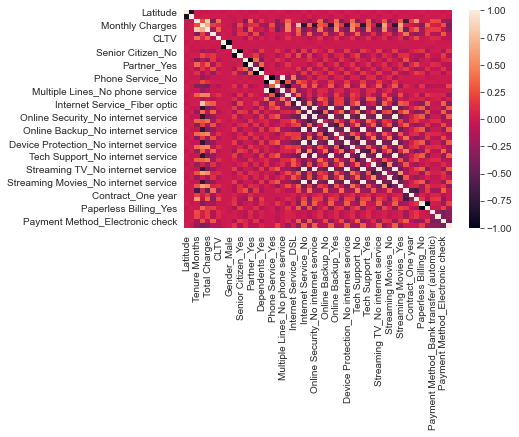

In [317]:
plt.figure()
sns.heatmap(df2.corr())

## Model

#### We apply different models to predict the churn rate. When evaluating those models, we should focus on the Recall, and the AUC.
#### It is very important that the model can correctly identify the customers who left the company. Thus the model Recall is very important.

#### Train-Test Split

In [365]:
X = df2.drop(columns=['Churn Value'])
y = df2.iloc[:,5]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.25, random_state=440, shuffle = True, stratify=y)

#### Import Evaluation Packages

In [366]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

#### Import Preprocessing Packages

In [388]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#### KNN

In [389]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 11))
knn.fit(X_train,y_train.values.ravel())
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [390]:
# Testing Confusion Matrix
print(confusion_matrix(y_test,y_test_predict))

[[1108  183]
 [ 187  280]]


In [391]:
# Testing performance metrics
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1291
           1       0.60      0.60      0.60       467

    accuracy                           0.79      1758
   macro avg       0.73      0.73      0.73      1758
weighted avg       0.79      0.79      0.79      1758



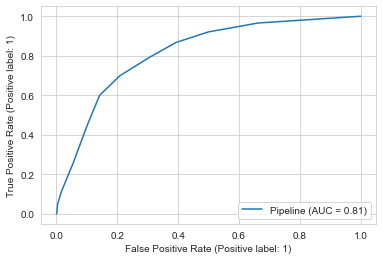

In [392]:
# ROC/AUC performance
metrics.plot_roc_curve(knn, X_test, y_test) 
plt.show()

#### Support Vector Classification

In [393]:
from sklearn.svm import SVC
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(X_train,y_train.values.ravel())
y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)

In [394]:
# Testing Confusion Matrix
print(confusion_matrix(y_test,y_test_predict))

[[1168  123]
 [ 216  251]]


In [395]:
# Testing performance metrics
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1291
           1       0.67      0.54      0.60       467

    accuracy                           0.81      1758
   macro avg       0.76      0.72      0.74      1758
weighted avg       0.80      0.81      0.80      1758



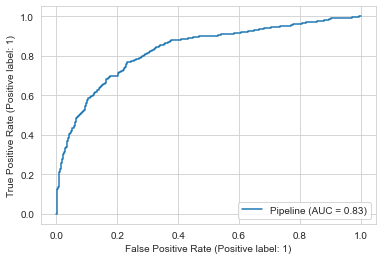

In [396]:
# ROC/AUC performance
metrics.plot_roc_curve(svc, X_test, y_test) 
plt.show()

#### Logistic Regression

In [397]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = make_pipeline(StandardScaler(), LogisticRegression(random_state = 614))
log_reg.fit(X_train,y_train.values.ravel())
y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)

In [398]:
# Testing Confusion Matrix
print(confusion_matrix(y_test,y_test_predict))

[[1157  134]
 [ 195  272]]


In [399]:
# Testing performance metrics
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1291
           1       0.67      0.58      0.62       467

    accuracy                           0.81      1758
   macro avg       0.76      0.74      0.75      1758
weighted avg       0.81      0.81      0.81      1758



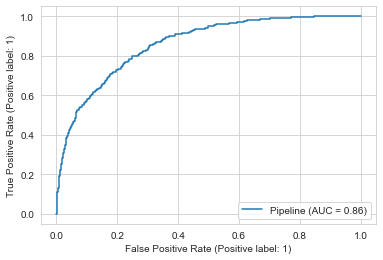

In [400]:
# ROC/AUC performance
metrics.plot_roc_curve(log_reg, X_test, y_test) 
plt.show()

#### Random Forest

In [401]:
# Random Forest with arbitrary hyperparameters
from sklearn.ensemble import RandomForestClassifier
forest_clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=500,max_depth = 6))
forest_clf.fit(X_train,y_train.values.ravel())
y_train_predict = forest_clf.predict(X_train)
y_test_predict = forest_clf.predict(X_test)


In [402]:
# Out-of-sample confusion matrix
print(confusion_matrix(y_test,y_test_predict))

[[1190  101]
 [ 228  239]]


In [403]:
# Out-of-sample performance metrics
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1291
           1       0.70      0.51      0.59       467

    accuracy                           0.81      1758
   macro avg       0.77      0.72      0.74      1758
weighted avg       0.80      0.81      0.80      1758



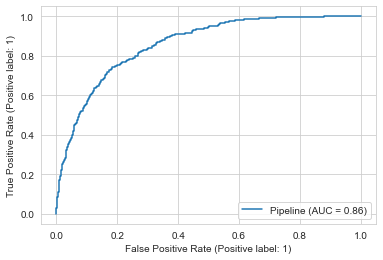

In [404]:
# ROC/AUC performance
metrics.plot_roc_curve(forest_clf, X_test, y_test) 
plt.show()

#### Fine-tuned Random Forest

In [405]:
# Tuning the random forest by a random search model
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter grid
param_grid = {
 'n_estimators': np.linspace(10, 200).astype(int),
 'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
 'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
 'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
 'min_samples_split': [2, 5, 10],
 'bootstrap': [True, False]
}
# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 614)
# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1,
 scoring = 'recall', cv = 5,
 n_iter = 10, verbose = 1, random_state=614)
# Fit 
rs.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=614),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                    

In [406]:
# The best hyperparameters
rs.best_params_

{'n_estimators': 52,
 'min_samples_split': 5,
 'max_leaf_nodes': 21,
 'max_features': 0.7999999999999999,
 'max_depth': 15,
 'bootstrap': False}

In [407]:
# Use the best model
best_model = rs.best_estimator_
y_train_predict = best_model.predict(X_train)
y_test_predict = best_model.predict(X_test)

In [408]:
# Out-of-sample confusion matrix
print(confusion_matrix(y_test,y_test_predict))

[[1165  126]
 [ 211  256]]


In [409]:
# Out-of-sample performance metrics
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1291
           1       0.67      0.55      0.60       467

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



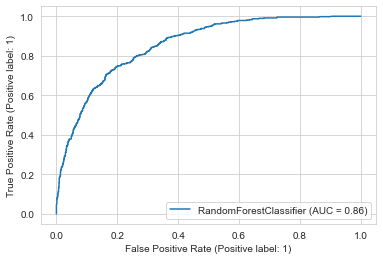

In [335]:
# ROC/AUC performance
metrics.plot_roc_curve(best_model, X_test, y_test) 
plt.show()

#### AdaBoost

In [414]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
adaboost = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state = 614))
adaboost.fit(X_train,y_train.values.ravel())
y_train_predict = adaboost.predict(X_train)
y_test_predict = adaboost.predict(X_test)

In [415]:
# Out-of-sample confusion matrix
print(confusion_matrix(y_test,y_test_predict))

[[1154  137]
 [ 201  266]]


In [416]:
# Out-of-sample performance metrics
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.66      0.57      0.61       467

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



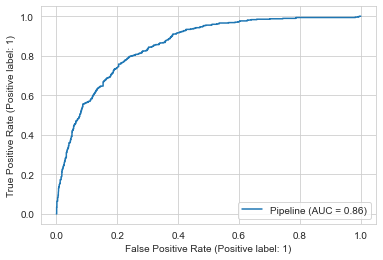

In [417]:
# ROC/AUC performance
metrics.plot_roc_curve(adaboost, X_test, y_test) 
plt.show()

#### XGBoost

In [420]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [431]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train.values.ravel())
y_train_predict = xgb.predict(X_train)
y_test_predict = xgb.predict(X_test)

[16:07:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [432]:
# Out-of-sample confusion matrix
print(confusion_matrix(y_test,y_test_predict))

[[1158  133]
 [ 218  249]]


In [433]:
# Out-of-sample performance metrics
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1291
           1       0.65      0.53      0.59       467

    accuracy                           0.80      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758



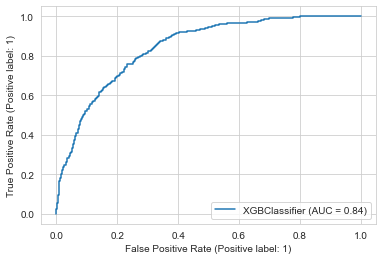

In [434]:
# ROC/AUC performance
metrics.plot_roc_curve(xgb, X_test, y_test) 
plt.show()

In [435]:
#pip install shap

In [440]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

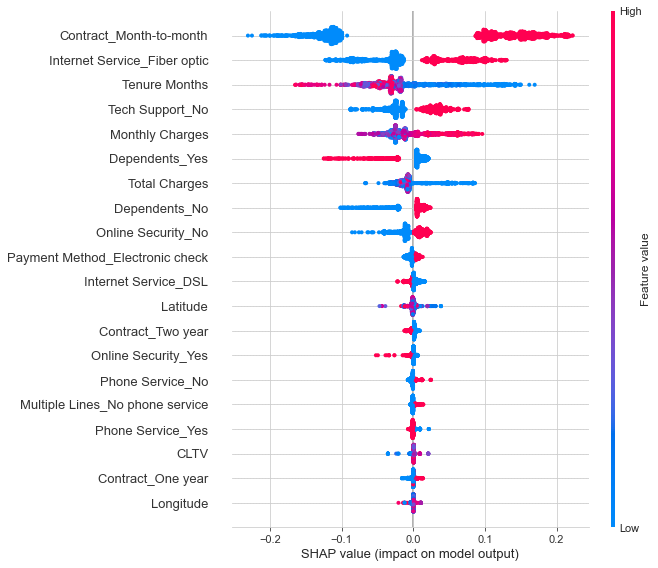

In [441]:
shap.summary_plot(shap_values[1], X_test)